## CLUSTERIZAÇÃO DE ESPECIES DE PINGUINS COM K-MEANS:

*Exploração do algoritmo de K-Means.
Técnica será aplicada em dados biológicos para identificar diferentes espécies de pinguins a partir de suas características físicas. 🐧✨ A base utilizada foi a Penguins (Seaborn), que reúne medições coletadas na Antártica sobre três espécies: Adelie, Chinstrap e Gentoo.*

*👉 O projeto reforça a versatilidade do Machine Learning, mostrando como métodos de clustering podem ser aplicados em áreas muito além de vendas e marketing.*

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#1- TRATAMENTO DO DF (EXCLUSÃO DE VALORES NULOS, SUBSTITUIÇÃO E DROP DE COLUNAS COM INSIGNIFICANCIA AO ESTUDO):

In [ ]:
import seaborn as sns
import pandas as pd

# carregar dataset
penguins = sns.load_dataset('penguins')

# verificar valores nulos por coluna
print(penguins.isnull().sum())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


- TRATAMENTO bill_length_mm:

In [ ]:
import seaborn as sns
import pandas as pd
import plotly.express as px

# Carregar dataset
penguins = sns.load_dataset('penguins')

# Cópia para tratamento
penguins_tratado = penguins.copy()

# Calcular média e mediana
media = penguins['bill_length_mm'].mean()
mediana = penguins['bill_length_mm'].median()

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")


Média: 43.92
Mediana: 44.45


In [ ]:
# Criar boxplot
fig = px.box(penguins,
             y="bill_length_mm",
             points="all",  # mostra todos os pontos
             title="Boxplot do Bill Length (mm)")

fig.show()


In [ ]:
import plotly.express as px

# Calcular média e mediana de bill_length_mm
media_length = penguins_tratado['bill_length_mm'].mean()
mediana_length = penguins_tratado['bill_length_mm'].median()

# Histograma de bill_length_mm
fig_hist_length = px.histogram(
    penguins_tratado,
    x="bill_length_mm",
    nbins=20,  # ajuste conforme desejar
    title="Histograma de Bill Length (mm)",
    labels={"bill_length_mm": "Bill Length (mm)"},
    marginal="box"  # adiciona boxplot no topo
)

# Adicionar linhas de média e mediana
fig_hist_length.add_vline(x=media_length, line_dash="dot", line_color="blue", annotation_text="Média")
fig_hist_length.add_vline(x=mediana_length, line_dash="dash", line_color="red", annotation_text="Mediana")

fig_hist_length.show()



Não há outliers, não precisa de controle aqui.

Distribuição simétrica, média ≈ mediana → pode usar a média.

In [ ]:
import seaborn as sns
import pandas as pd

# Carregar dataset original
penguins = sns.load_dataset('penguins')

# Criar uma cópia para tratar os dados
penguins_tratado = penguins.copy()

# Substituir os valores nulos por média
penguins_tratado['bill_length_mm'].fillna(media, inplace=True)

# Conferir se ainda há nulos
print("Valores nulos após tratamento:")
print(penguins_tratado['bill_length_mm'].isnull().sum())


Valores nulos após tratamento:
0


/tmp/ipython-input-741664455.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





- TRATAMENTO DE bill_depth_mm:

In [ ]:
# --- TRATAMENTO DE bill_depth_mm ---
media_depth = penguins_tratado['bill_depth_mm'].mean()
mediana_depth = penguins_tratado['bill_depth_mm'].median()

print(f"Média bill_depth_mm: {media_depth:.2f}")
print(f"Mediana bill_depth_mm: {mediana_depth:.2f}")

# Boxplot
fig = px.box(
    penguins_tratado,
    y="bill_depth_mm",
    points="all",
    title="Boxplot de Bill Depth (mm)"
)

# Adicionar linhas da média e mediana
fig.add_hline(y=media_depth, line_dash="dot", line_color="blue", annotation_text="Média")
fig.add_hline(y=mediana_depth, line_dash="dash", line_color="red", annotation_text="Mediana")

fig.show()



Média bill_depth_mm: 17.15
Mediana bill_depth_mm: 17.30


In [ ]:
import plotly.express as px

# Histograma de bill_depth_mm
fig_hist = px.histogram(
    penguins_tratado,
    x="bill_depth_mm",
    nbins=20,  # número de bins, você pode ajustar
    title="Histograma de Bill Depth (mm)",
    labels={"bill_depth_mm": "Bill Depth (mm)"},
    marginal="box"  # opcional: adiciona boxplot no topo
)

fig_hist.show()


Não há outliers, não precisa de controle aqui.

Distribuição simétrica, média ≈ mediana → pode usar a média.

In [ ]:
# Preencher valores nulos com a média
penguins_tratado['bill_depth_mm'].fillna(media_depth, inplace=True)

# Conferir se ainda há nulos
print("\nValores nulos após tratamento em bill_depth_mm:")
print(penguins_tratado['bill_depth_mm'].isnull().sum())


Valores nulos após tratamento em bill_depth_mm:
0


/tmp/ipython-input-3844229211.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





- TRATAMENTO flipper_length_mm:

In [ ]:
import seaborn as sns
import pandas as pd
import plotly.express as px

# --- Estatísticas de flipper_length_mm ---
media_flipper = penguins_tratado['flipper_length_mm'].mean()
mediana_flipper = penguins_tratado['flipper_length_mm'].median()

print(f"Média flipper_length_mm: {media_flipper:.2f}")
print(f"Mediana flipper_length_mm: {mediana_flipper:.2f}")


# --- Boxplot com Plotly ---
fig = px.box(
    penguins_tratado,
    y="flipper_length_mm",
    points="all",
    title="Boxplot de Flipper Length (mm)"
)

# Adicionar linhas de média e mediana
fig.add_hline(y=media_flipper, line_dash="dot", line_color="blue", annotation_text="Média")
fig.add_hline(y=mediana_flipper, line_dash="dash", line_color="red", annotation_text="Mediana")

fig.show()


Média flipper_length_mm: 200.92
Mediana flipper_length_mm: 197.00


In [ ]:
import plotly.express as px

# Histograma de flipper_length_mm
fig_hist_flipper = px.histogram(
    penguins_tratado,
    x="flipper_length_mm",
    nbins=20,  # número de bins, você pode ajustar
    title="Histograma de Flipper Length (mm)",
    labels={"flipper_length_mm": "Flipper Length (mm)"},
    marginal="box"  # adiciona boxplot no topo
)

fig_hist_flipper.show()


Para mais robustez e evitar influência de outliers, preencher com mediana geralmente é mais seguro, porque evita distorção por valores extremos.

In [ ]:
# --- Tratar valores nulos (substituir pela mediana) ---
penguins_tratado['flipper_length_mm'].fillna(mediana_flipper, inplace=True)

# Conferir se ainda há nulos
print("\nValores nulos após tratamento em flipper_length_mm:")
print(penguins_tratado['flipper_length_mm'].isnull().sum())



Valores nulos após tratamento em flipper_length_mm:
0


/tmp/ipython-input-434519294.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





- TRATAMENTO body_mass_g:

In [ ]:
import plotly.express as px

# --- Estatísticas de body_mass_g ---
media_body = penguins_tratado['body_mass_g'].mean()
mediana_body = penguins_tratado['body_mass_g'].median()

print(f"Média body_mass_g: {media_body:.2f}")
print(f"Mediana body_mass_g: {mediana_body:.2f}")

# --- Boxplot com Plotly ---
fig = px.box(
    penguins_tratado,
    y="body_mass_g",
    points="all",
    title="Boxplot de Body Mass (g)"
)

# Adicionar linhas de média e mediana
fig.add_hline(y=media_body, line_dash="dot", line_color="blue", annotation_text="Média")
fig.add_hline(y=mediana_body, line_dash="dash", line_color="red", annotation_text="Mediana")

fig.show()


Média body_mass_g: 4201.75
Mediana body_mass_g: 4050.00


In [ ]:
import plotly.express as px

# Histograma de body_mass_g
fig_hist_body = px.histogram(
    penguins_tratado,
    x="body_mass_g",
    nbins=20,  # número de bins, você pode ajustar
    title="Histograma de Body Mass (g)",
    labels={"body_mass_g": "Body Mass (g)"},
    marginal="box"  # adiciona boxplot no topo
)

fig_hist_body.show()


Para mais robustez e evitar influência de outliers, preencher com mediana geralmente é mais seguro, porque evita distorção por valores extremos.

In [ ]:
# Preencher valores nulos com a mediana
penguins_tratado['body_mass_g'].fillna(mediana_body, inplace=True)

# Conferir se ainda há nulos
print("Valores nulos após tratamento em body_mass_g:")
print(penguins_tratado['body_mass_g'].isnull().sum())


Valores nulos após tratamento em body_mass_g:
0


/tmp/ipython-input-4106208576.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





- TRATAMENTO sex :

In [ ]:
import plotly.express as px

# Contagem de cada categoria
contagem_sex = penguins_tratado['sex'].value_counts()
print(contagem_sex)

# Gráfico de barras
fig = px.bar(
    contagem_sex,
    x=contagem_sex.index,
    y=contagem_sex.values,
    title="Distribuição da coluna Sex",
    labels={"x": "Sex", "y": "Contagem"}
)

fig.show()


sex
Male      168
Female    165
Name: count, dtype: int64


Para análise exploratória e consistência estatística, é melhor manter a proporção original, preenchendo os nulos aleatoriamente respeitando a proporção Male/Female existente por mais que seja pequena.

In [ ]:
import numpy as np

# Contar valores existentes
contagem = penguins_tratado['sex'].value_counts()
total_existente = contagem.sum()

# Calcular proporção de cada categoria
prop_male = contagem.get('Male', 0) / total_existente
prop_female = contagem.get('Female', 0) / total_existente

# Quantidade de nulos
n_nulos = penguins_tratado['sex'].isnull().sum()
print(f"Nulos na coluna sex: {n_nulos}")

# Criar lista para preencher nulos mantendo proporção
preenchimento = np.random.choice(
    ['Male', 'Female'],
    size=n_nulos,
    p=[prop_male, prop_female]  # mantém proporção original
)

# Preencher os nulos
penguins_tratado.loc[penguins_tratado['sex'].isnull(), 'sex'] = preenchimento

# Conferir distribuição final
print("\nDistribuição final após preenchimento:")
print(penguins_tratado['sex'].value_counts())


Nulos na coluna sex: 11

Distribuição final após preenchimento:
sex
Male      176
Female    168
Name: count, dtype: int64


In [ ]:
# Verificar total de valores nulos por coluna
print("Valores nulos por coluna:")
print(penguins_tratado.isnull().sum())

# Verificar se existe algum nulo em todo o DataFrame
if penguins_tratado.isnull().values.any():
    print("\nAinda existem valores nulos no DataFrame.")
else:
    print("\nTodos os dados foram tratados. Nenhum valor nulo presente!")


Valores nulos por coluna:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Todos os dados foram tratados. Nenhum valor nulo presente!


- Dropando colunas que não serão utilizadas:

KMeans trabalha apenas com variáveis numéricas (porque calcula distâncias euclidianas).

Colunas categóricas como species, sex, island não podem ser usadas diretamente.

In [ ]:
# Selecionar apenas colunas numéricas
penguins_numerico = penguins_tratado.select_dtypes(include='number')

# Conferir resultado
print(penguins_numerico.head())
print("\nColunas restantes:", penguins_numerico.columns.tolist())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        39.10000       18.70000              181.0       3750.0
1        39.50000       17.40000              186.0       3800.0
2        40.30000       18.00000              195.0       3250.0
3        43.92193       17.15117              197.0       4050.0
4        36.70000       19.30000              193.0       3450.0

Colunas restantes: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


Df a ser utilizado: penguins_numerico

#2 - PAIRPLOTS:

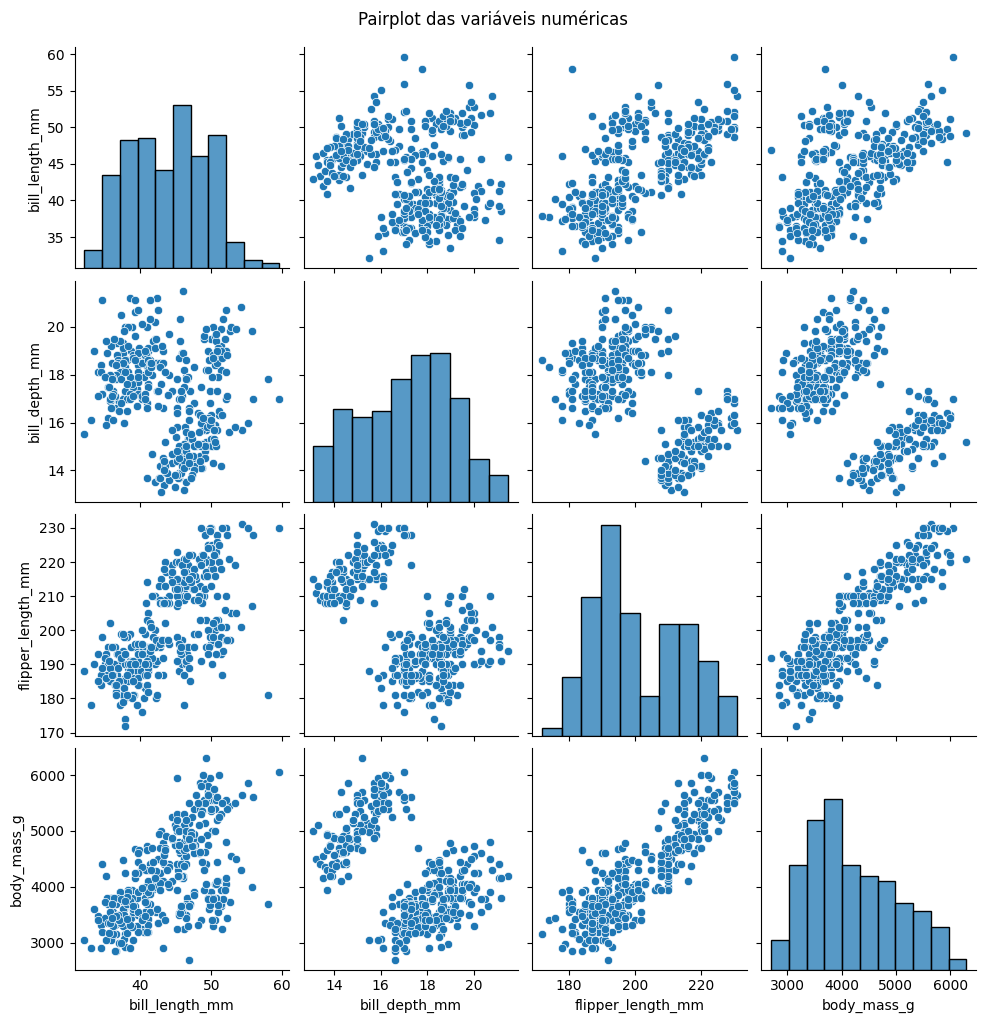

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar variáveis numéricas (opcional, já estão em penguins_numerico)
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Criar pairplot a partir do df penguins_numerico
sns.pairplot(penguins_numerico[variaveis])
plt.suptitle("Pairplot das variáveis numéricas", y=1.02)  # título geral
plt.show()



Relações interessantes vistas pelos pairplots:

Depth x Flipper = Me parece dividir-se bem em 2 grupos;

Depth x Body Mass = Divide-se também em 2 grupos;

Depth x Length = Dividi-se não tão bem quanto os outros dois, mas vejo possiveis 3 grupos.

# 3 - Padronização e Visualização dos Dados:

KMeans usa distância euclidiana, e variáveis com escalas diferentes podem distorcer os clusters.

Uso do StandartScaler transforma os dados para que cada coluna tenha:

Média = 0
Desvio padrão = 1

Para que todas as variáveis contribam igualmente para a distância euclidiana, evitando que alguma domine o resultado.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Variáveis a padronizar
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Criar scaler
scaler = StandardScaler()

# Aplicar padronização
penguins_padronizado = penguins_numerico.copy()
penguins_padronizado[variaveis] = scaler.fit_transform(penguins_padronizado[variaveis])

# Conferir resultado
print(penguins_padronizado.head())
print("\nMédia após padronização (aproximadamente 0):")
print(penguins_padronizado[variaveis].mean())
print("\nDesvio padrão após padronização (aproximadamente 1):")
print(penguins_padronizado[variaveis].std())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0   -8.870812e-01   7.877425e-01          -1.420541    -0.564625
1   -8.134940e-01   1.265563e-01          -1.063485    -0.502010
2   -6.663195e-01   4.317192e-01          -0.420786    -1.190773
3   -1.307172e-15   1.806927e-15          -0.277964    -0.188936
4   -1.328605e+00   1.092905e+00          -0.563608    -0.940314

Média após padronização (aproximadamente 0):
bill_length_mm      -1.156697e-15
bill_depth_mm        4.131062e-16
flipper_length_mm    2.891744e-16
body_mass_g          8.262125e-17
dtype: float64

Desvio padrão após padronização (aproximadamente 1):
bill_length_mm       1.001457
bill_depth_mm        1.001457
flipper_length_mm    1.001457
body_mass_g          1.001457
dtype: float64


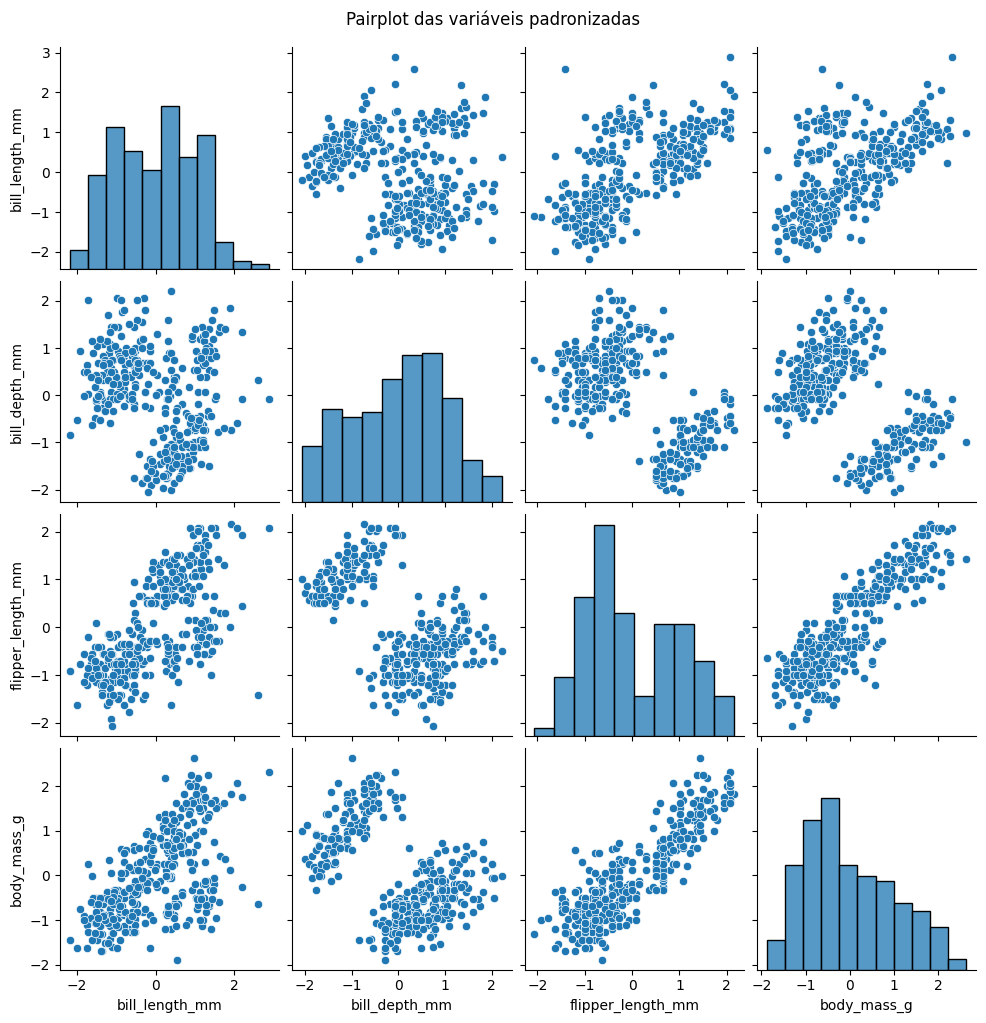

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variáveis padronizadas
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Pairplot após padronização
sns.pairplot(penguins_padronizado[variaveis])
plt.suptitle("Pairplot das variáveis padronizadas", y=1.02)
plt.show()


Visualização melhorou, mas não significativamente de forma a mudar os insigths anteriores em relação aos pairplots iniciais.

# 4 - K MEANS CLUSTER = 3.

Para KMeans, é fortemente recomendado usar o DataFrame padronizado, e aqui está o porquê:

- Distância euclidiana: O algoritmo calcula distâncias entre pontos para agrupar dados.

Variáveis em escalas diferentes vão dominar a distância, influenciando desproporcionalmente a formação dos clusters.

Exemplo: body_mass_g (3000–6000) teria muito mais peso que bill_length_mm (40–60), mesmo que ambas sejam importantes.

- Padronização garante igualdade de contribuição

Ao usar StandardScaler, todas as variáveis terão:

Média ≈ 0

Desvio padrão ≈ 1

Assim, cada variável contribui equilibradamente para calcular a distância e formar clusters.

- Evita clusters enviesados

Sem padronização, KMeans tende a criar clusters dominado pela variável de maior escala, o que distorce os resultados.

Com padronização, os clusters refletem realmente padrões combinados das variáveis, e não apenas o efeito da magnitude.

Resumo:

SEMPRE USAR DADOS padronizados para KMeans quando variáveis estão em escalas diferentes.

In [ ]:
from sklearn.cluster import KMeans

# Número de clusters
k = 3

# Inicializar o KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar o modelo e prever os clusters
clusters = kmeans.fit_predict(penguins_padronizado)

# Adicionar os clusters ao DataFrame padronizado
penguins_padronizado['Cluster'] = clusters

# Conferir os primeiros registros
print(penguins_padronizado.head())

# Contagem de pontos em cada cluster
print("\nDistribuição dos clusters:")
print(penguins_padronizado['Cluster'].value_counts())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  Cluster
0   -8.870812e-01   7.877425e-01          -1.420541    -0.564625        0
1   -8.134940e-01   1.265563e-01          -1.063485    -0.502010        0
2   -6.663195e-01   4.317192e-01          -0.420786    -1.190773        0
3   -1.307172e-15   1.806927e-15          -0.277964    -0.188936        2
4   -1.328605e+00   1.092905e+00          -0.563608    -0.940314        0

Distribuição dos clusters:
Cluster
0    132
1    123
2     89
Name: count, dtype: int64


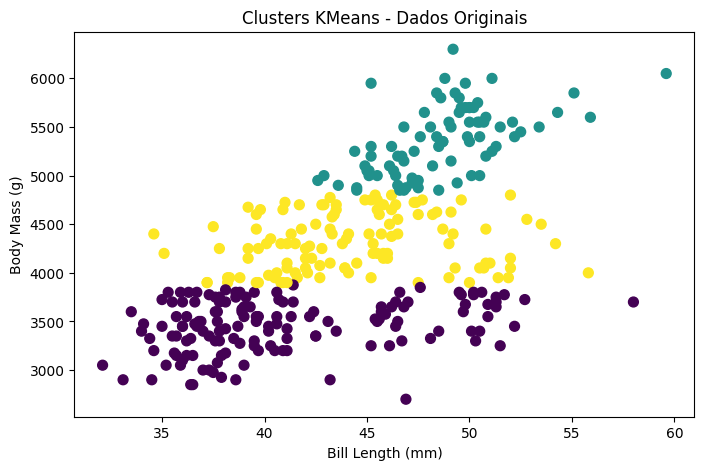

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selecionar duas variáveis para visualização
variaveis_viz = ['bill_length_mm', 'body_mass_g']

# KMeans com dados originais
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(penguins_numerico[variaveis_viz])

# Plotar
plt.figure(figsize=(8,5))
plt.scatter(penguins_numerico['bill_length_mm'], penguins_numerico['body_mass_g'],
            c=clusters_original, cmap='viridis', s=50)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Clusters KMeans - Dados Originais')
plt.show()


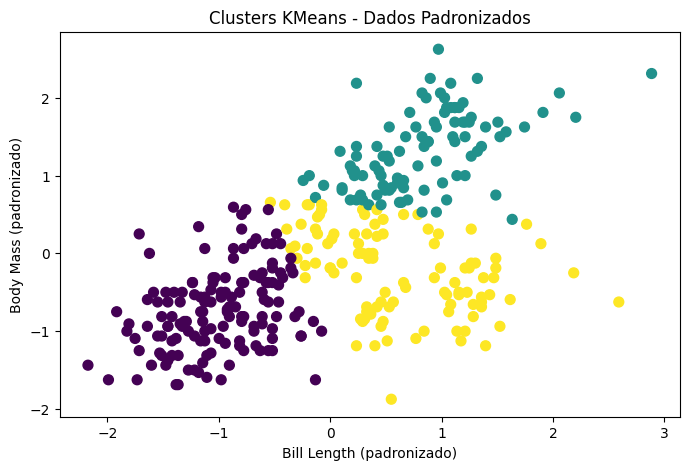

In [ ]:
# KMeans com dados padronizados
kmeans_padronizado = KMeans(n_clusters=3, random_state=42)
clusters_pad = kmeans_padronizado.fit_predict(penguins_padronizado[variaveis_viz])

# Plotar
plt.figure(figsize=(8,5))
plt.scatter(penguins_padronizado['bill_length_mm'], penguins_padronizado['body_mass_g'],
            c=clusters_pad, cmap='viridis', s=50)
plt.xlabel('Bill Length (padronizado)')
plt.ylabel('Body Mass (padronizado)')
plt.title('Clusters KMeans - Dados Padronizados')
plt.show()


# 5 - Matrix de Dispersão.

In [ ]:
import plotly.express as px
import pandas as pd

# Variáveis padronizadas já selecionadas
variaveis = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Centroides dos clusters
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=variaveis)
centroides['Cluster'] = [0,1,2]  # rótulos dos clusters

# Adicionar coluna Cluster ao df padronizado
df_plot = penguins_padronizado.copy()
df_plot['Cluster'] = penguins_padronizado['Cluster'].astype(str)  # string para cores

# --- Primeiro gráfico: Bill Length vs Bill Depth ---
fig1 = px.scatter(
    df_plot,
    x='bill_length_mm',
    y='bill_depth_mm',
    color='Cluster',
    symbol='Cluster',
    title="Dispersão: Bill Length vs Bill Depth",
)

# Adicionar centroides
for i, centro in centroides.iterrows():
    fig1.add_scatter(x=[centro['bill_length_mm']], y=[centro['bill_depth_mm']],
                     mode='markers', marker=dict(size=15, symbol='x', color='black'),
                     name=f'Centroide {i}')

fig1.show()

# --- Segundo gráfico: Bill Depth vs Body Mass ---
fig2 = px.scatter(
    df_plot,
    x='bill_depth_mm',
    y='body_mass_g',
    color='Cluster',
    symbol='Cluster',
    title="Dispersão: Bill Depth vs Body Mass",
)

# Adicionar centroides
for i, centro in centroides.iterrows():
    fig2.add_scatter(x=[centro['bill_depth_mm']], y=[centro['body_mass_g']],
                     mode='markers', marker=dict(size=15, symbol='x', color='black'),
                     name=f'Centroide {i}')

fig2.show()



No primeiro K means foi bem interessante de ver o como se dividiu bem os 3 grupos na distribuição, como a segunda relação a divisão é mais marcante em dois grupos, os centroides do cluster 0 e cluster 2 ainda estão bem embaralhados, o que fica muito dificil a divisão entre as 3 especies de pinguim. Mas se nota que a especia de cluster 1 é bem definida em suas caracteristicas.

#6 - Outras utilidades do algotitimo K MEANS:

Detecção de anomalias (Anomaly Detection):

Objetivo: Identificar dados que não se encaixam em nenhum cluster.

Aplicação: Fraudes financeiras, falhas em máquinas, monitoramento de redes.

Exemplo: Transações bancárias que não se encaixam em clusters de comportamento normal podem ser sinalizadas como suspeitas.

Agrupamento de documentos ou textos (Text Clustering)

Objetivo: Organizar documentos em grupos com temas semelhantes.

Aplicação: Sistemas de recomendação, organização de grandes bases de dados, motores de busca.

Exemplo: Agrupar artigos de notícias automaticamente em categorias como “esportes”, “política” e “tecnologia”.